In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [18]:
data = pd.read_csv(r"C:\Users\chakr\OneDrive\Documents\Coding raja\Sentiment\Twitter_Data.csv")

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [24]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [21]:
data.dropna(inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [28]:
data.reset_index(drop=True,inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162969 entries, 0 to 162968
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [31]:
data['category'].value_counts()

category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64

<Axes: xlabel='category'>

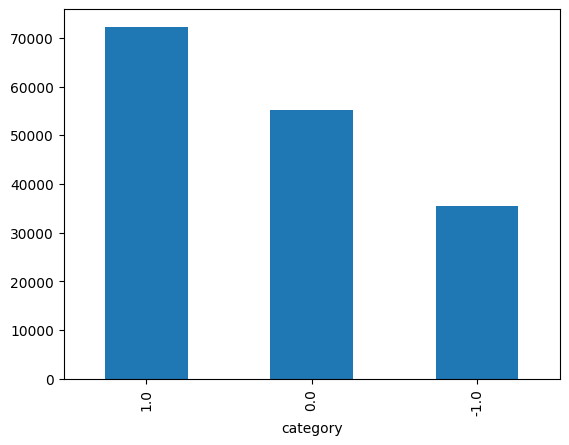

In [34]:
data['category'].value_counts().plot(kind='bar')

#Stemming- to convert every word into its base form
 ->removing other characters rather than alpha

In [22]:
port=PorterStemmer()

In [23]:
def stemmed_content(comment):
    sc=re.sub('[^a-zA-z]',' ',comment)
    sc=sc.lower()
    sc=sc.split()
    sc=[port.stem(words) for words in sc if not words in stopwords.words('english')]
    sc=' '.join(sc)
    
    return sc

In [24]:
data['clean_text']=data['clean_text'].apply(stemmed_content)

In [20]:
data.head()

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0


#Vectorizing -because model cant understand text..so converting into numbers

In [25]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, use_idf=True, norm='l2', smooth_idf=True)

x = tfidf.fit_transform(data.clean_text)
y = data.category.values

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=50)


In [28]:
model=LogisticRegression(max_iter=1000)

In [29]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred=model.predict(X_test)

In [31]:
a=accuracy_score(Y_test,y_pred)

In [32]:
print(a)

0.842885193593913


In [33]:
y_pred=model.predict(X_train)

In [34]:
a=accuracy_score(Y_train,y_pred)

In [35]:
print(a)

0.8744851390220518


In [36]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
 

In [37]:
import os
os.getcwd()


'C:\\Users\\chakr'

In [38]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))